# Load the Libraries


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load Dataset

In [18]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

### Load Data: Loading the crime data CSV file.

**Source and Structure**:

**DR_NO**: This likely stands for "Department Report Number" or a similar designation, which is a unique identifier for each incident.

**Date Rptd**: The date when the incident was reported.

**DATE OCC**: The date when the incident occurred.

**TIME OCC**: The time when the incident occurred.

**AREA**: Numerical code for the police area or precinct.

**AREA NAME**: Name of the area or precinct.

**Rpt Dist No**: Report district number, which is a more specific area within the precinct.

**Part 1-2**: This could refer to a classification system for incidents, where Part 1 crimes are typically more serious offenses.

**Crm Cd**: Crime code, a numerical identifier for the type of crime.

**Crm Cd Desc**: Description of the crime.

**Status**: A code indicating the current status of the case (e.g., "IC" for Investigative Continuation, "AO" for Adult Other, "AA" for Adult Arrest).

**Status Desc**: Description of the status.

**Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4**: These fields likely provide additional codes related to the crime, but in the data shown, these fields are not filled (NaN - Not a Number).

**LOCATION**: The general location where the incident occurred.

**Cross Street**: This field is blank in the data shown but would typically indicate the nearest cross street to the incident location.

**LAT, LON**: Latitude and longitude coordinates for the location of the incident.

**Content**:
* The data includes various types of crimes such as assault, non-compliance by a sex offender, and vandalism.
* The incidents occurred in different areas, such as Southwest, Central, Hollywood, and Mission.
* The status of the cases varies, with some under investigation and at least one resulting in an arrest.
* The latitude and longitude data suggest that the incidents occurred in the Los Angeles area, given the coordinate ranges.


## Data Pre-Processing


In [19]:
# get the shape of the data
print("No of Records: ", df.shape[0])
print("No of Columns: ", df.shape[1])

No of Records:  852950
No of Columns:  28


In [20]:
# check for the Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           852950 non-null  int64  
 1   Date Rptd       852950 non-null  object 
 2   DATE OCC        852950 non-null  object 
 3   TIME OCC        852950 non-null  int64  
 4   AREA            852950 non-null  int64  
 5   AREA NAME       852950 non-null  object 
 6   Rpt Dist No     852950 non-null  int64  
 7   Part 1-2        852950 non-null  int64  
 8   Crm Cd          852950 non-null  int64  
 9   Crm Cd Desc     852950 non-null  object 
 10  Mocodes         734639 non-null  object 
 11  Vict Age        852950 non-null  int64  
 12  Vict Sex        740344 non-null  object 
 13  Vict Descent    740336 non-null  object 
 14  Premis Cd       852940 non-null  float64
 15  Premis Desc     852432 non-null  object 
 16  Weapon Used Cd  296748 non-null  float64
 17  Weapon Des

### Data Shape: Printing the number of records and columns.

1. **Data Shape**:
   - **Number of Columns**: There are 28 columns, indicating that each record has 28 attributes or fields associated with it.
   -**Number of Records**: There are 852,950 records.

2. **Data Types**:
   - The output shows the data type (`dtype`) of each column in the DataFrame.
   - Most of the numeric identifiers, such as `DR_NO`, `AREA`, and `Rpt Dist No`, are of type `int64`, which is a typical format for representing integer values.
   - Many columns have the type `object`, which in pandas usually means strings or mixed types, such as text or categorical data.
   - Some columns are of type `float64`, which are used to represent floating-point numbers, and may contain numerical data with decimals or NaN (Not a Number) values for missing data.

### Importance of Understanding the Dataset's Size:

Understanding the size and structure of the dataset is a critical first step in any data analysis process. It informs the analyst about the scope of the analysis, the methodologies that can be applied, and the potential insights that can be extracted.


In [21]:
# Calculate percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)


In [22]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

### Display Columns: Displaying the dataset's columns.

- `DR_NO`: Unique identifier for each crime record, essential for individual case tracking.
- `Date Rptd`, `DATE OCC`, `TIME OCC`: Dates and times of report and occurrence, key for temporal trend analysis.
- `AREA`, `AREA NAME`: Location codes and names, useful for geographic analysis and pattern detection.
- `Rpt Dist No`: Specific district information for more detailed location analysis.
- `Part 1-2`: Crime severity classification, useful for prioritization and resource planning.
- `Crm Cd`, `Crm Cd Desc`: Crime type identifiers, central for categorization and trend analysis.
- `Mocodes`: Modus operandi details, critical for pattern recognition and case linkage.
- `Vict Age`, `Vict Sex`, `Vict Descent`: Victim demographics, important for demographic trend analysis.
- `Premis Cd`, `Premis Desc`: Location type details, relevant for context-specific crime analysis.
- `Weapon Used Cd`, `Weapon Desc`: Information on weapons used, significant for violence severity assessment.
- `Status`, `Status Desc`: Case progression details, useful for monitoring investigation outcomes.
- `Crm Cd 1` to `Crm Cd 4`: Additional crime details, possibly related to specific charges or incident aspects.
- `LOCATION`, `Cross Street`, `LAT`, `LON`: Various levels of location detail, crucial for spatial crime analysis and mapping.

Each column contributes valuable data for different aspects of crime analysis.


In [23]:
# the variables that have high missing values needs to be removed
# drop the columns that have more than 50% missing values
df.drop(columns=['Weapon Used Cd','Weapon Desc', 'Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street'],inplace=True)

# remove the rows that have missing values
df.dropna(inplace=True)
# Calculate percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

DR_NO           0.0
Date Rptd       0.0
DATE OCC        0.0
TIME OCC        0.0
AREA            0.0
AREA NAME       0.0
Rpt Dist No     0.0
Part 1-2        0.0
Crm Cd          0.0
Crm Cd Desc     0.0
Mocodes         0.0
Vict Age        0.0
Vict Sex        0.0
Vict Descent    0.0
Premis Cd       0.0
Premis Desc     0.0
Status          0.0
Status Desc     0.0
Crm Cd 1        0.0
LOCATION        0.0
LAT             0.0
LON             0.0
dtype: float64

### Missing Values Percentage & Handling Missing Values

In the output, we see a list of columns with a 0.0% missing value rate, which suggests that the DataFrame no longer contains any missing values for those columns.

**Dropping columns with more than 50% missing values and rows with any missing values**

The 50% threshold for missing values is a heuristic some data analysts use to determine when a column may not be useful for analysis. Here's the rationale behind using such a threshold:

`Data Quality`: A column with more than 50% missing values has more unknowns than knowns, which can significantly compromise the quality of any analysis conducted.

`Representativeness`: If more than half the values are missing, the remaining data may not be representative of the whole. This can lead to biased results if the missing data is not missing at random.

`Imputation Challenges`: While there are methods to impute missing values, such as using the mean or median, these become less reliable and meaningful when the proportion of missing data is very high.

`Clarity and Focus`: Columns with excessive missing values can detract from the clarity and focus of the analysis. Removing them can help direct attention to the more complete, and likely more informative, aspects of the dataset.

In [24]:
# check for the Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733656 entries, 0 to 852949
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DR_NO         733656 non-null  int64  
 1   Date Rptd     733656 non-null  object 
 2   DATE OCC      733656 non-null  object 
 3   TIME OCC      733656 non-null  int64  
 4   AREA          733656 non-null  int64  
 5   AREA NAME     733656 non-null  object 
 6   Rpt Dist No   733656 non-null  int64  
 7   Part 1-2      733656 non-null  int64  
 8   Crm Cd        733656 non-null  int64  
 9   Crm Cd Desc   733656 non-null  object 
 10  Mocodes       733656 non-null  object 
 11  Vict Age      733656 non-null  int64  
 12  Vict Sex      733656 non-null  object 
 13  Vict Descent  733656 non-null  object 
 14  Premis Cd     733656 non-null  float64
 15  Premis Desc   733656 non-null  object 
 16  Status        733656 non-null  object 
 17  Status Desc   733656 non-null  object 
 18  Crm 

### Data Types Check: Displaying information about each column's data type
Knowing the data type is particularly important because it affects how you might handle each column. For instance, DR_NO being an integer suggests it's a unique identifier and should not be used in any mathematical computation. On the other hand, LAT and LON as floating-point numbers are suitable for calculations involving geographical locations, such as distance computations or mapping.

In [25]:
# convert the date time to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

### Convert Dates to Datetime: Converting date columns to datetime objects.

Converting date and time information to a datetime object ensures that the data is treated as temporal data rather than as strings or generic objects, enabling the use of specialized time series functionalities in pandas.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733656 entries, 0 to 852949
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         733656 non-null  int64         
 1   Date Rptd     733656 non-null  datetime64[ns]
 2   DATE OCC      733656 non-null  datetime64[ns]
 3   TIME OCC      733656 non-null  int64         
 4   AREA          733656 non-null  int64         
 5   AREA NAME     733656 non-null  object        
 6   Rpt Dist No   733656 non-null  int64         
 7   Part 1-2      733656 non-null  int64         
 8   Crm Cd        733656 non-null  int64         
 9   Crm Cd Desc   733656 non-null  object        
 10  Mocodes       733656 non-null  object        
 11  Vict Age      733656 non-null  int64         
 12  Vict Sex      733656 non-null  object        
 13  Vict Descent  733656 non-null  object        
 14  Premis Cd     733656 non-null  float64       
 15  Premis Desc   733

In [27]:
# check for the unique values in the columns
df.nunique()

DR_NO           733656
Date Rptd         1434
DATE OCC          1434
TIME OCC          1439
AREA                21
AREA NAME           21
Rpt Dist No       1195
Part 1-2             2
Crm Cd             137
Crm Cd Desc        137
Mocodes         282192
Vict Age           102
Vict Sex             5
Vict Descent        20
Premis Cd          307
Premis Desc        306
Status               6
Status Desc          6
Crm Cd 1           138
LOCATION         61170
LAT               5362
LON               4959
dtype: int64

### Check Unique Values: Checking for the number of unique values in each column.

**Identifying Categorical Variables**: Columns with a relatively small number of unique values compared to the number of total records are likely to be categorical variables. For example, Part 1-2 with only 2 unique values or Vict Sex with 5 indicate categorical data.

**Understanding Data Diversity**: The number of unique values gives insight into the diversity within each column. A column like Mocodes with 282,192 unique values suggests a high diversity, which could indicate a high level of detail or specificity in the data.

# Descriptive Statistics

In [28]:
# the details of the columns
df.describe()

DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  7.336560e+05  733656.000000  733656.000000  733656.000000   
mean   2.166644e+08    1322.404632      10.628769    1109.217313   
std    1.098984e+07     652.820274       6.117455     611.638904   
min    1.030447e+07       1.000000       1.000000     101.000000   
25%    2.102152e+08     900.000000       6.000000     615.000000   
50%    2.202151e+08    1400.000000      11.000000    1128.000000   
75%    2.301076e+08    1840.000000      16.000000    1608.000000   
max    2.399306e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd      Vict Age      Premis Cd  \
count  733656.000000  733656.000000  733656.00000  733656.000000   
mean        1.470226     500.400388      34.29581     332.646715   
std         0.499113     221.725037      19.79270     216.044656   
min         1.000000     110.000000      -3.00000     101.000000   
25%         1.000000     330.000000      23.00000     108.000000   
50%         1.000000     440.000000      34.00000     401.000000   
75%         2.000000     649.000000      48.00000     502.000000   
max         2.000000     956.000000      99.00000     971.000000   

            Crm Cd 1            LAT            LON  
count  733656.000000  733656.000000  733656.000000  
mean      500.099289      33.975566    -118.012005  
std       221.495508       1.835311       6.364337  
min       110.000000       0.000000    -118.667600  
25%       330.000000      34.015800    -118.431200  
50%       440.000000      34.059100    -118.323000  
75%       649.000000      34.162300    -118.273900  
max       956.000000      34.334300       0.000000

### Descriptive Statistics: Displaying statistical details of the dataset.
The `DR_NO` column seems to contain a wide range of values, and given it's likely an identifier, the mean and standard deviation are not very informative.

The `Date Rptd` and `DATE OCC` mean dates are relatively recent, which might reflect the period of data collection or indicate recent data entry.

The `TIME OCC` column's mean suggests a midday bias, but this might not be meaningful without context, as it's the average of times converted to numerical format.

The `AREA` and `Rpt Dist No` show a reasonable range of values, likely corresponding to different precincts or report areas.

The `Part 1-2` has a mean close to 1, indicating one category might be more frequent than the other.

The `Crm Cd` and `Crm Cd 1` columns' means and standard deviations suggest a variety of crime codes, but the interpretation would depend on the coding system.

The `Vict Age` has a mean of around 35, but the minimum value indicates a potential data entry error or a placeholder value.

The percentiles for `LAT` and `LON` indicate the geographical spread of the incidents.

# Visualizations

In [29]:
import plotly.express as px

# Assuming df is your DataFrame with a 'Vict Age' column
fig = px.box(df, y='Vict Age', title='Boxplot of Victim Age')
fig.update_layout(yaxis_title='Victim Age')

fig.show()


### Boxplot analysis

* The distribution of ages seems to be skewed slightly towards younger ages, given the median line is closer to the top of the box (indicating more data is congregated towards the lower end of the age spectrum).
* The ages span a broad range, from very young to quite old, as indicated by the whiskers.
* There may be outliers on the higher age range, indicated by the points above the upper whisker. These could represent inaccurately recorded ages, rare cases of very old victims, or other anomalies.

This boxplot can help in understanding the age distribution of victims and in identifying any data recording errors or exceptional cases within the dataset.

In [30]:
# Assuming df is your DataFrame with a 'DATE OCC' column
# Create a new DataFrame to count occurrences for each date
date_counts = df['DATE OCC'].value_counts().reset_index()
date_counts.columns = ['DATE OCC', 'Count']

# Sort the DataFrame by the date
date_counts = date_counts.sort_values(by='DATE OCC')

# Plot time series with trendline
fig = px.line(date_counts, x='DATE OCC', y='Count', title='Time Series Plot of Crimes over the Duration')
fig.update_layout(xaxis_title='Date', yaxis_title='Count')

# Add trendline
# fig.update_traces(trendline='ols')  # You can use other trendline options like 'lowess' or 'rolling'

fig.show()

### Time series plot analysis

This time series plot shows the count of crimes over a span of time, from 2020 to 2023.

**Overall Trend**: There is no clear long-term upward or downward trend visible in the crime count over the entire period. However, there appears to be a drop-off at the very end.

**Seasonality**: The plot shows some regular patterns that could indicate seasonality - regular fluctuations in crime count that could correspond to days of the week, months, or other cyclical events.

**Spikes**: There are noticeable spikes in crime count at regular intervals. These could represent specific days (like weekends) where crime rates are higher. Alternatively, they might correspond to reporting cycles or specific events that led to an increase in crime reporting.

**Volatility**: The crime counts show considerable volatility, with the number of crimes reported each period varying significantly. This might indicate that certain periods or events cause a rise in crime incidents or reporting.

**Anomalies**: There are some exceptionally high spikes that stand out from the general pattern. These could be days with unusually high crime reports and may warrant further investigation.

In [31]:
# Assuming df is your DataFrame with a 'Crm Cd Desc' column
top_crimes = df["Crm Cd Desc"].value_counts().head(10).reset_index()
top_crimes.columns = ['Crime Code Description', 'Count']

fig = px.bar(top_crimes,
             x='Crime Code Description',
             y='Count',
             title='Top 10 Crime Code Descriptions for Los Angeles',
             labels={'Count': 'Crime Count'},
             height=1000)

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Crime Code Description', yaxis_title='Count')
fig.show()

### Bar Chart Analysis

This bar chart represents the most frequently reported crimes in Los Angeles, with the y-axis showing the count of incidents and the x-axis listing different types of crimes.

**Most Common Crime**: The crime with the highest count is "Battery - Simple Assault," suggesting that it is the most commonly reported crime in the dataset for Los Angeles.

**Crime Variety**: The chart includes a variety of crime types, ranging from theft-related offenses to assault and vandalism. This indicates a range of criminal activities that law enforcement deals with in the city.

**Theft and Assault**: Theft and assault appear to be the most common categories of crime, with multiple entries in the top 10. This includes theft of identity, theft from vehicles, and different levels of assault.

**Property Crimes**: Several crimes involve property, such as burglary, vandalism, and motor vehicle theft, indicating these are significant concerns in the area.

**Violent Crimes**: Alongside property crimes, violent crimes like assault and robbery are also prevalent.

The specific counts and the ordering of crimes can inform law enforcement and public policy officials where to focus prevention efforts and resources. For instance, strategies to reduce simple assault and theft could be prioritized, given their high frequency. Additionally, community outreach and education programs could be tailored to address the most common crime types represented in this chart.

In [32]:

# Assuming df is your DataFrame with a 'Vict Sex' column
victim_gender_counts = df['Vict Sex'].value_counts().reset_index()
victim_gender_counts.columns = ['Victim Gender', 'Count']

fig = px.pie(victim_gender_counts,
             names='Victim Gender',
             values='Count',
             title='Distribution of Victim Gender',
             labels={'Count': 'Number of Victims'},
             hole=0.3)

fig.update_traces(textinfo='percent+label', pull=[0.1, 0], hoverinfo='label+percent')
fig.show()


### Donut Chart Analysis

This is a donut chart representing the distribution of victim gender in reported crimes. Here is the interpretation based on the provided segments and percentages:

**Male (M)**: Represents 47.5% of the victims, indicating that nearly half of the crime victims in the data are male.

**Female (F)**: Accounts for 42.3% of the victims, which is slightly less than the proportion of male victims.

**Gender X (X)**: Makes up 10.2% of the cases, suggesting that a significant portion of victims have their gender recorded as non-binary, unspecified, or possibly as an alternative designation used in the data.

**Not Reported (-)**: This category, at 0.00136%, is negligible, indicating very few records have missing or unreported gender data.

**Other (H)**: At 0.0127%, this is a very small proportion, which might indicate another category or designation for gender not specified in the chart legend.

The presence of categories beyond the traditional male and female options suggests an acknowledgment of gender diversity in the data collection process. The substantial percentage for 'X' could reflect a progressive approach to gender identification, or it might include cases where the gender of the victim was not determined or was chosen not to be disclosed.

The chart provides a visual distribution of gender among crime victims, which could be useful for understanding the demographics of crime victimization and for ensuring that resources, support, and prevention efforts are appropriately allocated.

In [33]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [34]:
# Assuming df is your DataFrame with an 'AREA NAME' column
area_distribution = df['AREA NAME'].value_counts().reset_index()
area_distribution.columns = ['Area Name', 'Count']

fig = px.bar(area_distribution,
             x='Area Name',
             y='Count',
             title='Crime Distribution in Los Angeles Areas',
             labels={'Count': 'Crime Count'},
             height=500)

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Area Name', yaxis_title='Count')
fig.show()


### Bar Chart Analysis

This bar chart shows the count of crimes reported in various areas of Los Angeles.

From the chart, we can interpret that:

**Central Area**: The Central area has the highest count of reported crimes, noticeably more than the other areas. This could be due to a variety of factors including population density, urbanization, or policing practices.

 **Declining Counts**: There is a general trend of declining crime counts as we move from the left to the right of the chart. This may reflect differences in the sizes of these areas, their population densities, economic factors, or other socio-demographic variables that affect crime rates.

**Least Affected Areas**: The areas with the lowest crime counts, such as Hollenbeck & Foothill might be residential or less densely populated, or they might have effective crime prevention strategies in place.

 **Comparison Among Areas**: By comparing the counts of crimes across different areas, policymakers and law enforcement agencies can identify which areas might require more resources or different strategies to reduce crime.

This chart provides a clear visualization of how crime is distributed across the different areas of Los Angeles and could serve as a tool for resource allocation, strategic planning, and targeted interventions to manage crime in the city.

In [35]:
# Drop the rows that have 0 lattitude or longitude
df = df[(df['LAT'] != 0) & (df['LON'] != 0)]

In [36]:
location_counts = df.groupby(['LAT', 'LON']).size().reset_index(name='Count')

In [38]:
import plotly.express as px

# Assuming location_counts is your DataFrame with 'LAT', 'LON', and 'Count' columns
fig = px.scatter_geo(location_counts, lat='LAT', lon='LON', color='Count',
                     hover_name='Count',
                     title='Crime Distribution in Los Angeles',
                     scope='usa',
                     center={'lat': 34.0522, 'lon': -118.2437},
                     fitbounds='locations',
                     color_continuous_scale='Viridis',  # You can choose a different color scale
                     color_continuous_midpoint=12.5,  # Set the midpoint for the color scale
                     range_color=[0, 25])  # Set the color range

fig.show()


### Hexbin Map

The heatmap provides a visual representation of crime distribution in Los Angeles, effectively using color intensity to convey the concentration of crime events. Areas with the highest crime rates are indicated in yellow, showing distinct hotspots, particularly in densely populated regions or urban centers. The gradation from cooler colors (purple and blue) to warmer colors (yellow) illustrates a range from lower to higher crime occurrences. This visualization highlights the geographic disparities in crime frequency across the city, which could be pivotal for law enforcement and public policy strategies focusing on crime prevention and resource allocation.

Overall, the hexbin map serves as a tool for identifying not just the general spread of crimes across Los Angeles, but also for pinpointing regional crime trends, such as the high occurrence of certain crimes in specific neighborhoods. This kind of detailed visualization aids in tailoring crime prevention and response strategies to the unique needs of each area.

In [39]:
# make a crosstab between Area Name and Crime Code Description
area_crime = pd.crosstab(df['Crm Cd Desc'],df['AREA NAME'])
area_crime.style.background_gradient(cmap='Blues')

### Crosstab Analysis

The table provides a detailed breakdown of various types of crimes across different areas in Los Angeles. It categorizes incidents ranging from serious offenses like aggravated assault to property crimes like burglary. For example, aggravated assaults appear notably high in the `Central` and `Southwest` areas, while burglary from vehicles is particularly prevalent in `77th Street` and `Southwest`. The data also shows areas where certain crimes are more concentrated; for instance, `Bike - Stolen` incidents are significantly higher in the `Pacific` area.

By examining this table, authorities can identify which crimes are most common in which areas, potentially allowing them to allocate resources more effectively, develop targeted crime prevention strategies, and understand patterns or trends within specific precincts.

In [40]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

<Axes: >

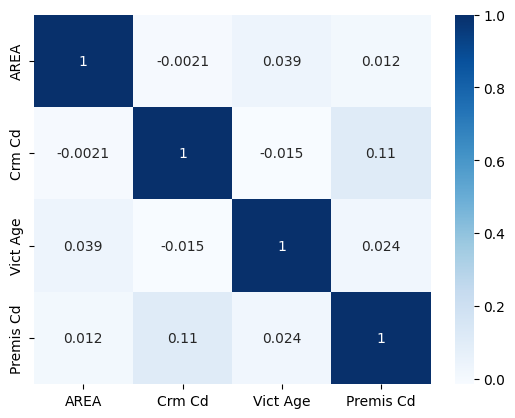

In [41]:
sns.heatmap(df.select_dtypes(exclude='object').drop(columns=["DR_NO","LAT","LON","Date Rptd","DATE OCC","TIME OCC","Part 1-2","Rpt Dist No","Crm Cd 1"]).corr(),annot=True,cmap='Blues')

### Heatmap Analysis

This is a correlation matrix heatmap. This kind of visualization is commonly used in statistics to represent the correlation coefficients between pairs of variables.

**Variables**: Along both the horizontal and vertical axes, you see the names of variables (AREA, Crm Cd, Vict Age, Premis Cd). These are the items for which the pairwise correlation coefficients are calculated.

**Correlation Coefficients**: The numbers in the cells represent the Pearson correlation coefficients between the pairs of variables. These coefficients can range from -1 to 1.

`1 or close to 1 (dark blue)`: Indicates a perfect or strong positive correlation, meaning as one variable increases, the other also increases.
`0 or close to 0 (light blue to white)`: Indicates no correlation, meaning the variables do not have a linear relationship.
`-1 or close to -1 (not shown in this heatmap)`: Would indicate a perfect or strong negative correlation, meaning as one variable increases, the other decreases.
`Significance`: Without additional statistical context, such as p-values or a significance threshold, we cannot determine if these correlations are statistically significant.

**Interpretations:**

`AREA` and `Crm Cd` have a very low negative correlation (-0.0021), which is essentially negligible, suggesting no meaningful linear relationship.
`AREA` and `Vict Age` have a low positive correlation (0.039), which is also quite small and likely not meaningful in a practical sense.
`AREA` and `Premis Cd` have an even smaller positive correlation (0.012), which again suggests no meaningful relationship.
`Crm Cd` and `Vict Age` have a very low negative correlation (-0.015), and `Crm Cd` and `Premis Cd` have a low positive correlation (0.11), which might suggest a weak relationship that could be explored further.
`Vict Age` and `Premis Cd` have a very low positive correlation (0.024), indicating a negligible linear relationship.
